In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap


In [2]:
df=pd.read_csv(r"C:\\Users\\Philipp\\OneDrive - UT Cloud\\Data_literacy_mensa\\Mensa_10-01-24\\wednesday100124.csv")
df

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len
0,1,"Jan 10, 2024 10:01:07.758711000 Mitteleuropäis...",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298
1,2,"Jan 10, 2024 10:01:07.784807000 Mitteleuropäis...",NaN,NaN,802.11,39
2,3,"Jan 10, 2024 10:01:07.794917000 Mitteleuropäis...",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43
3,4,"Jan 10, 2024 10:01:07.795010000 Mitteleuropäis...",NaN,NaN,802.11,29
4,5,"Jan 10, 2024 10:01:07.795542000 Mitteleuropäis...",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286
...,...,...,...,...,...,...
15338369,15338370,"Jan 10, 2024 12:59:52.317226000 Mitteleuropäis...",NaN,NaN,802.11,35
15338370,15338371,"Jan 10, 2024 12:59:52.317274000 Mitteleuropäis...",NaN,NaN,802.11,29
15338371,15338372,"Jan 10, 2024 12:59:52.317323000 Mitteleuropäis...",NaN,NaN,802.11,33
15338372,15338373,"Jan 10, 2024 12:59:52.317375000 Mitteleuropäis...",NaN,NaN,802.11,47


<Axes: ylabel='Density'>

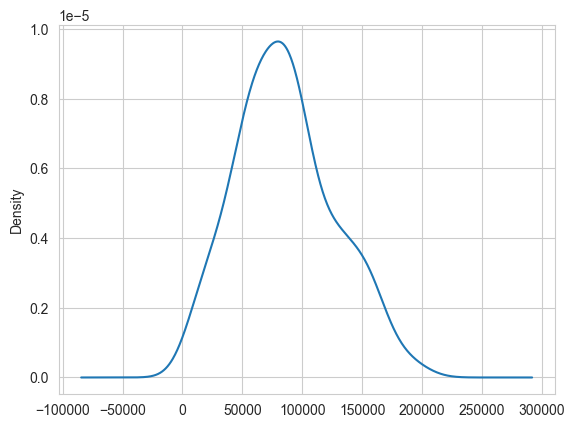

In [3]:
df["frame.time"] = df["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
df["frame.time"].value_counts().sort_index().plot(kind='density')


In [8]:
df['date-time'] = pd.to_datetime(df['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET'), format='%b %d, %Y %I:%M %Z')
df['hour:minute'] = df['date-time'].dt.strftime('%H:%M')
df

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,date-time,hour:minute
0,1,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298,2024-01-10 10:01:00+01:00,10:01
1,2,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",NaN,NaN,802.11,39,2024-01-10 10:01:00+01:00,10:01
2,3,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43,2024-01-10 10:01:00+01:00,10:01
3,4,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",NaN,NaN,802.11,29,2024-01-10 10:01:00+01:00,10:01
4,5,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,2024-01-10 10:01:00+01:00,10:01
...,...,...,...,...,...,...,...,...
15338369,15338370,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,35,2024-01-10 00:59:00+01:00,00:59
15338370,15338371,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,29,2024-01-10 00:59:00+01:00,00:59
15338371,15338372,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,33,2024-01-10 00:59:00+01:00,00:59
15338372,15338373,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,47,2024-01-10 00:59:00+01:00,00:59


In [9]:
(df["wlan.sa"].value_counts()).count()
#df["wlan.sa"].value_counts()

326030

In [10]:
df_first = df.drop_duplicates(subset='wlan.sa', keep='first')
df_first.tail()

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,date-time,hour:minute
15338033,15338034,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",f6:8c:64:8d:46:c1,NaN,802.11,48,2024-01-10 00:59:00+01:00,00:59
15338077,15338078,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",f6:aa:64:8d:46:27,NaN,802.11,36,2024-01-10 00:59:00+01:00,00:59
15338199,15338200,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",c4:ba:b9:d0:77:c0,NaN,802.11,54,2024-01-10 00:59:00+01:00,00:59
15338209,15338210,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",92:aa:64:8d:46:8f,NaN,802.11,36,2024-01-10 00:59:00+01:00,00:59
15338308,15338309,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",54:a8:1d:5a:8e:c9,NaN,802.11,36,2024-01-10 00:59:00+01:00,00:59


In [46]:
per_min_new

,count
hour:minute,
10:59,489
11:00,306
11:01,196
11:02,117
11:03,86
...,...
14:05,2217
14:06,3449
14:07,5745


Text(0.5, 1.0, 'first seen Count vs Time')

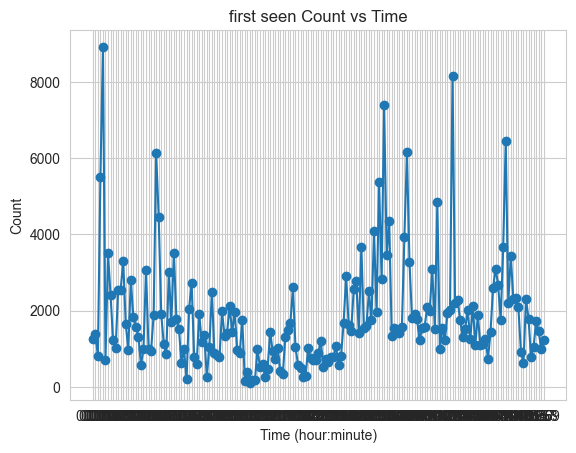

In [11]:
per_min_new=pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count vs Time')

In [12]:
df_last = df.drop_duplicates(subset='wlan.sa', keep='last')
df_last.tail()

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,date-time,hour:minute
15338308,15338309,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",54:a8:1d:5a:8e:c9,NaN,802.11,36,2024-01-10 00:59:00+01:00,00:59
15338320,15338321,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",a2:0c:a7:fe:22:ee,00:f6:63:81:c8:6b,802.11,45,2024-01-10 00:59:00+01:00,00:59
15338322,15338323,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",2e:c2:34:06:37:ac,00:f6:63:81:c8:6f,802.11,43,2024-01-10 00:59:00+01:00,00:59
15338365,15338366,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,2024-01-10 00:59:00+01:00,00:59
15338373,15338374,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,60,2024-01-10 00:59:00+01:00,00:59


Text(0.5, 1.0, 'Last seen Count vs Time')

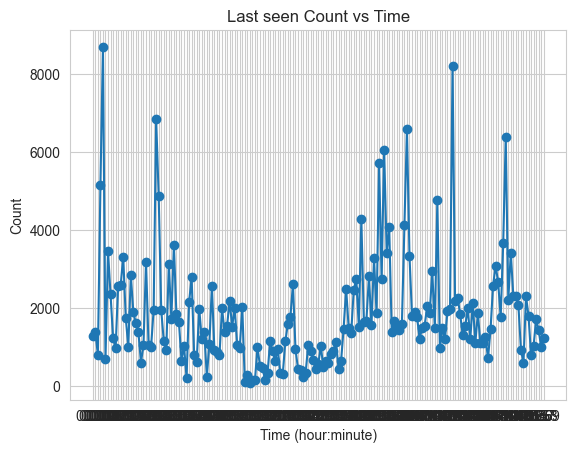

In [13]:
per_min_last=pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Last seen Count vs Time')

Text(0.5, 1.0, 'Count vs Time')

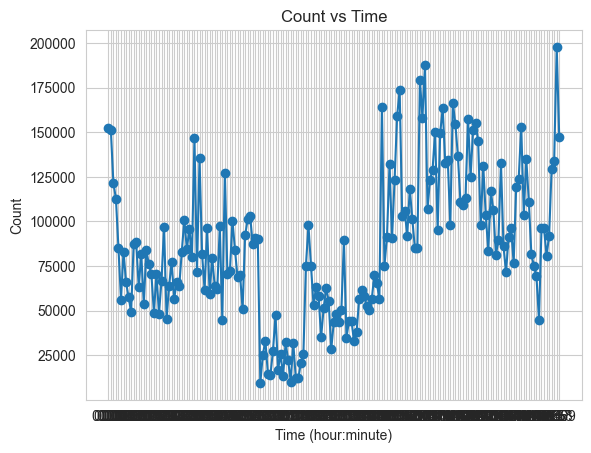

In [14]:
per_min=pd.DataFrame(df["hour:minute"].value_counts().sort_index())
plt.plot(per_min['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

C:\Users\Philipp\AppData\Local\Temp\ipykernel_6176\1105561439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)


Text(0.5, 1.0, 'Count vs Time')

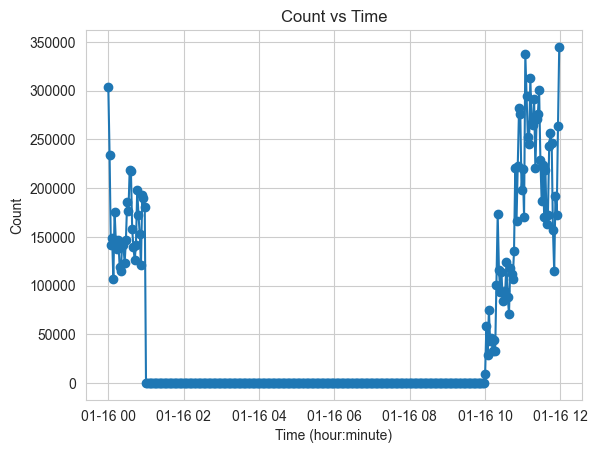

In [15]:
dtt = pd.DataFrame({'hour:minute':per_min.index.tolist(),'count': per_min["count"]})
dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)
dtt.set_index('hour:minute', inplace=True)
dtt_new = dtt.resample('2T').sum()
dtt_new
plt.plot(dtt_new['count'], marker="o")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

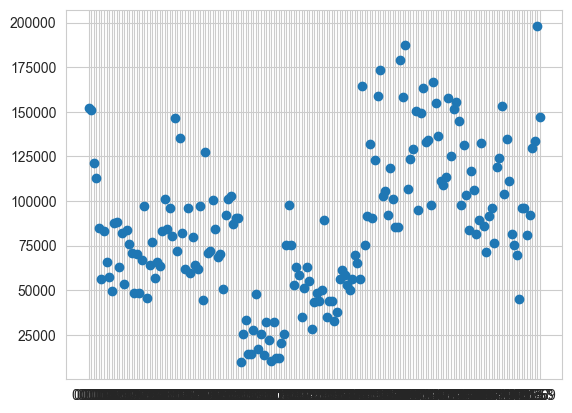

In [16]:
ax=plt.plot_date(per_min.index,per_min["count"],xdate=True)

In [24]:
from dateutil import parser
from datetime import datetime
import re